In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


%matplotlib inline 

In [2]:
import earth_model

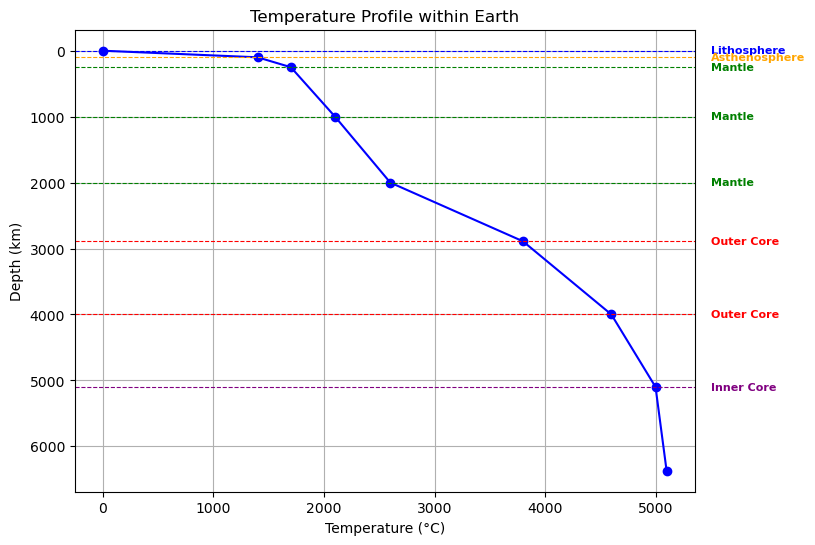

In [6]:
import matplotlib.pyplot as plt

depths = [0, 100, 250, 1000, 2000, 2890, 4000, 5100, 6370]  # Depth in kilometers
temperatures = [0, 1400, 1700, 2100, 2600, 3800, 4600, 5000, 5100]  # Temperature in Celsius

layers = ['Lithosphere', 'Asthenosphere', 'Mantle', 'Mantle', 'Mantle', 'Outer Core', 'Outer Core', 'Inner Core']
colors = ['blue', 'orange', 'green', 'green', 'green', 'red', 'red', 'purple']

plt.figure(figsize=(8, 6))
plt.plot(temperatures, depths, marker='o', linestyle='-', color='blue')

for depth, layer, color in zip(depths, layers, colors):
    plt.axhline(y=depth, color=color, linestyle='--', linewidth=0.8)
    plt.text(5500, depth, layer, ha='left', va='center', color=color, fontsize=8, weight='bold')

plt.title('Temperature Profile within Earth')
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [4]:
layers = [
    ("Lithosphere", (0, 100), (0, 1400), 14, 2.05),
    ("Asthenosphere", (100, 250), (1400, 1700), 2, 3.8),
    ("Mantle", (250, 1000), (1700, 2100), 0.53, 3.8),
    ("Mantle", (1000, 2000), (2100, 2600), 0.5, 6.1),
    ("Mantle", (2000, 2890), (2600, 3800), 1.35, 8.1),
    ("Outer Core", (2890, 4000), (3800, 4600), 0.72, 12.5),
    ("Outer Core", (4000, 5100), (4600, 5000), 0.36, 12.5),
    ("Inner Core", (5100, 6370), (5000, 5100), 0.079, 50)
]

# Calculate heat flow for each layer
heat_flows = []
for layer in layers:
    depth_range = layer[1][1] - layer[1][0]
    temperature_range = layer[2][1] - layer[2][0]
    temperature_gradient = layer[3]
    conductivity = layer[4]

    heat_flow = conductivity * temperature_gradient * depth_range
    heat_flows.append(heat_flow)

heat_flows_mw = [flow * 1000 for flow in heat_flows]
print(heat_flows_mw)

[2869999.9999999995, 1140000.0, 1510499.9999999998, 3050000.0, 9732150.0, 9990000.0, 4950000.0, 5016500.0]


In [5]:
header = ["Layer", "Depth Range (km)", "Temperature Range (°C)", "Heat Flow (mW/m^2)"]
data = []
for i, layer in enumerate(layers):
    depth_range = f"{layer[1][0]} - {layer[1][1]}"
    temp_range = f"{layer[2][0]} - {layer[2][1]}"
    data.append([layer[0], depth_range, temp_range, f"{heat_flows_mw[i]:.2f}"])

print("{:<15} {:<20} {:<25} {:<20}".format(*header))
print("="*80)
for row in data:
    print("{:<15} {:<20} {:<25} {:<20}".format(*row))

Layer           Depth Range (km)     Temperature Range (°C)    Heat Flow (mW/m^2)  
Lithosphere     0 - 100              0 - 1400                  2870000.00          
Asthenosphere   100 - 250            1400 - 1700               1140000.00          
Mantle          250 - 1000           1700 - 2100               1510500.00          
Mantle          1000 - 2000          2100 - 2600               3050000.00          
Mantle          2000 - 2890          2600 - 3800               9732150.00          
Outer Core      2890 - 4000          3800 - 4600               9990000.00          
Outer Core      4000 - 5100          4600 - 5000               4950000.00          
Inner Core      5100 - 6370          5000 - 5100               5016500.00          


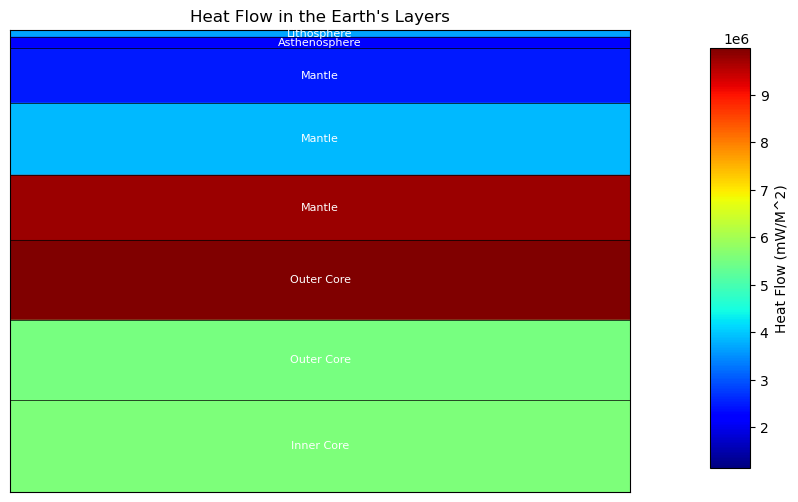

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

layer_boundaries = [0, 100, 250, 1000, 2000, 2890, 4000, 5100, 6370]
layer_names = ['Lithosphere', 'Asthenosphere', 'Mantle', 'Mantle', 'Mantle', 'Outer Core', 'Outer Core', 'Inner Core']

midpoint_depths = [(layer_boundaries[i] + layer_boundaries[i + 1]) / 2 for i in range(len(layer_boundaries) - 1)]

fig, ax = plt.subplots(figsize=(8, 6))

for i, depth in enumerate(midpoint_depths):
    rect = plt.Rectangle((-1, layer_boundaries[i]), 2, layer_boundaries[i + 1] - layer_boundaries[i],
                         color=plt.cm.jet(heat_flows_mw[i] / max(heat_flows_mw)))
    ax.add_patch(rect)
    ax.text(0, midpoint_depths[i], layer_names[i], ha='center', va='center', color='white', fontsize=8)
    ax.axhline(y=layer_boundaries[i], color='black', linestyle='-', linewidth=0.5)

ax.set_xlim([-1, 1])
ax.set_ylim([6370, 0]) 
ax.set_xticks([]) 
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Heat Flow in the Earth\'s Layers')

# Create a colorbar
norm = plt.Normalize(vmin=min(heat_flows_mw), vmax=max(heat_flows_mw))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array(heat_flows_mw)
cbar = plt.colorbar(sm, ax=ax, cax=fig.add_axes([1.0, 0.15, 0.05, 0.7]), orientation='vertical')
cbar.set_label('Heat Flow (mW/M^2)')

plt.show()

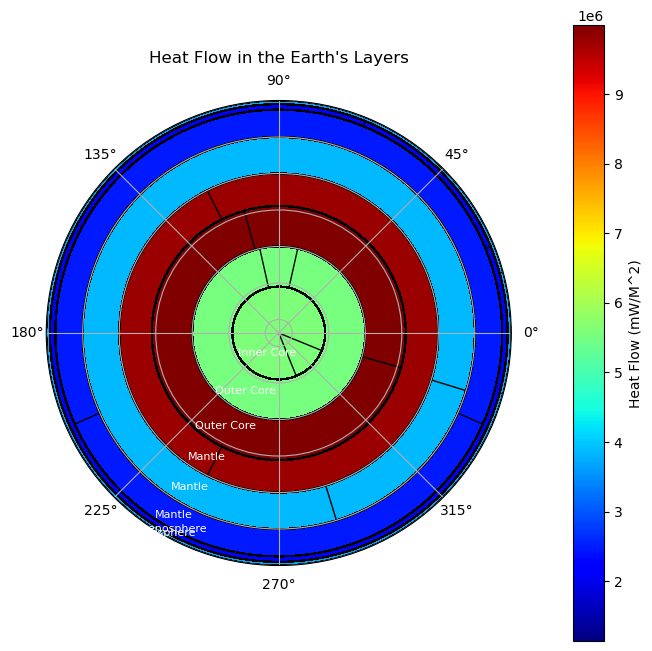

In [1]:
import matplotlib.pyplot as plt
import numpy as np

layers = [
    ("Lithosphere", (0, 100), (0, 1400), 14, 2.05),
    ("Asthenosphere", (100, 250), (1400, 1700), 2, 3.8),
    ("Mantle", (250, 1000), (1700, 2100), 0.53, 3.8),
    ("Mantle", (1000, 2000), (2100, 2600), 0.5, 6.1),
    ("Mantle", (2000, 2890), (2600, 3800), 1.35, 8.1),
    ("Outer Core", (2890, 4000), (3800, 4600), 0.72, 12.5),
    ("Outer Core", (4000, 5100), (4600, 5000), 0.36, 12.5),
    ("Inner Core", (5100, 6370), (5000, 5100), 0.079, 50)
]

# Calculate heat flow for each layer
heat_flows = []
for layer in layers:
    depth_range = layer[1][1] - layer[1][0]
    temperature_range = layer[2][1] - layer[2][0]
    temperature_gradient = layer[3]
    conductivity = layer[4]

    heat_flow = conductivity * temperature_gradient * depth_range
    heat_flows.append(heat_flow)

heat_flows_mw = [flow * 1000 for flow in heat_flows]

# Calculate layer radii and angles for polar plot
layer_radii = [(layer[1][1] + layer[1][0]) / 2 for layer in layers]
angles = np.linspace(0, 2 * np.pi, len(layer_radii), endpoint=False)

# Create polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot annuli (rings) based on heat flow
for i, (radius, heat) in enumerate(zip(layer_radii, heat_flows_mw)):
    width = layers[i][1][1] - layers[i][1][0]
    color = plt.cm.jet(heat / max(heat_flows_mw))
    bars = ax.bar(angles[i], width=width, bottom=radius - width / 2, height=width, color=color)

    for bar in bars:
        bar.set_edgecolor('black')  # Adding black edges to the bars for better visibility
    ax.text(4 * np.pi / 3, radius, layers[i][0], ha='center', va='center', color='white', fontsize=8)

ax.set_ylim(6371, 0)  # Set the radial limits from center to Earth's surface
ax.set_yticklabels([])  # Hide radial ticks
ax.set_title('Heat Flow in the Earth\'s Layers', va='bottom')

# Create a colorbar for polar plot
norm = plt.Normalize(vmin=min(heat_flows_mw), vmax=max(heat_flows_mw))
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Heat Flow (mW/M^2)')

plt.show()


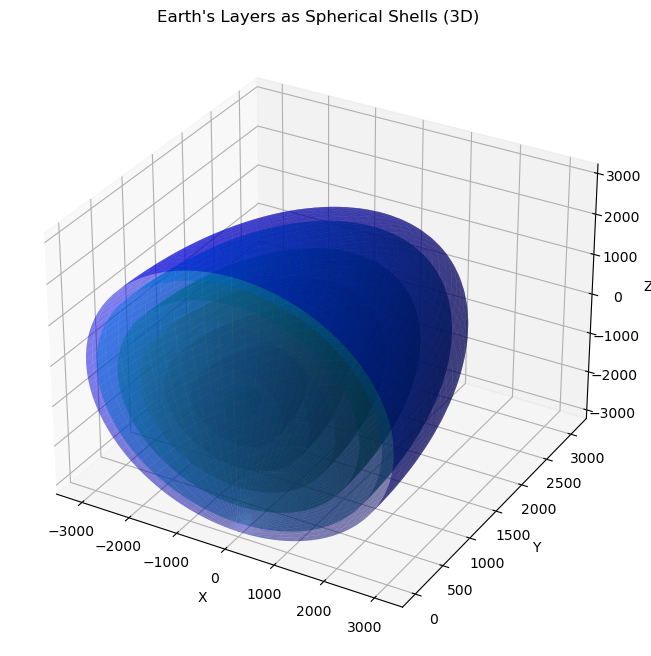

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

layers = [
    ("Lithosphere", (0, 100), (0, 1400), 14, 2.05),
    ("Asthenosphere", (100, 250), (1400, 1700), 2, 3.8),
    ("Mantle", (250, 1000), (1700, 2100), 0.53, 3.8),
    ("Mantle", (1000, 2000), (2100, 2600), 0.5, 6.1),
    ("Mantle", (2000, 2890), (2600, 3800), 1.35, 8.1),
    ("Outer Core", (2890, 4000), (3800, 4600), 0.72, 12.5),
    ("Outer Core", (4000, 5100), (4600, 5000), 0.36, 12.5),
    ("Inner Core", (5100, 6370), (5000, 5100), 0.079, 50)
]

# Calculate heat flow for each layer
heat_flows = []
for layer in layers:
    depth_range = layer[1][1] - layer[1][0]
    temperature_gradient = layer[3]
    conductivity = layer[4]

    heat_flow = conductivity * temperature_gradient * depth_range
    heat_flows.append(heat_flow)

heat_flows_mw = [flow * 1000 for flow in heat_flows]

layer_boundaries = [layer[1][1] for layer in layers]

layer_radii = [(6370 - (layer_boundaries[i] + layer_boundaries[i + 1]) / 2) / 2 for i in range(len(layer_boundaries) - 1)]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors corresponding to heat flow values for layers
colors = [
    (0, 0, 1),    # Blue - Lithosphere
    (0, 1, 1),    # Cyan - Asthenosphere
    (0, 1, 0),    # Green - Mantle
    (1, 1, 0),    # Yellow - Outer Core
    (1, 0.5, 0),  # Orange - Inner Core
    (1, 0, 0),    # green - Outer Core
    (0, 1, 0) # green - Inner Core
]

# Plot spherical shells for each layer with assigned colors
for i, (radius, heat) in enumerate(zip(layer_radii, heat_flows_mw)):
    u = np.linspace(0, np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    u, v = np.meshgrid(u, v)

    # Parametric equations for a spherical shell
    x = radius * np.sin(v) * np.cos(u)
    y = radius * np.sin(v) * np.sin(u)
    z = -radius * np.cos(v)  # Invert Z-axis

    color = colors[i % len(colors)]  # Cycle through colors for different layers
    ax.plot_surface(x, y, z, color=color, alpha=0.5)

ax.set_title('Earth\'s Layers as Spherical Shells (3D)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
